#                        ZOMATO DATASET ANALYSIS


This dataset offers a thorough overview of the restaurant sector in India's 13 major cities (900 eateries). This dataset can be used by researchers, analysts, and food fans to learn more about a variety of topics, including dining and delivery ratings, customer evaluations and preferences, popular cuisines, best-selling items, and pricing data for various cities. It makes it possible to investigate eating habits, evaluate restaurants and cuisines across cities, and spot trends in the food business. This dataset is an invaluable tool for comprehending the Indian culinary scene and for making data-driven judgements on the restaurant industry, client satisfaction, and dietary preferences.

## TASKS:

 1.Handling null values                                                                                                      
 2.Performing EDA                                                                                                           
 3.Quesions Analysis                                                                                                 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Zomato Data
zomato = pd.read_csv("zomato_dataset.csv")
print("TOTAL NO. OF ROWS AND COLUMNS: ",zomato.shape)
zomato.head()

TOTAL NO. OF ROWS AND COLUMNS:  (123657, 12)


,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


In [3]:
zomato_filter=zomato.dropna(subset=['Dining Rating'], inplace=True)
print(zomato.shape)
zomato.isnull().sum()

(91421, 12)


Restaurant Name        0
Dining Rating          0
Delivery Rating       61
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        71193
Votes                  0
Prices                 0
dtype: int64

In [4]:
zomato.isnull().sum()
print(zomato.shape)

(91421, 12)


# QUESTION ANALYSIS

#### *1.What is the average price of the best-selling dishes compared to the non-best-selling dishes*

In [5]:
zomato_best=zomato[zomato['Best Seller']=='BESTSELLER']
zomato_not_best=zomato[zomato['Best Seller']!='BESTSELLER']
total_bestseller = zomato_best['Prices'].mean()
total_not_bestseller = zomato_not_best['Prices'].mean()
print("average price of the best-selling dishes: ",total_bestseller)
print("average price of the non-best-selling dishes: ",total_not_bestseller)

average price of the best-selling dishes:  240.46518867924527
average price of the non-best-selling dishes:  239.90939349131125


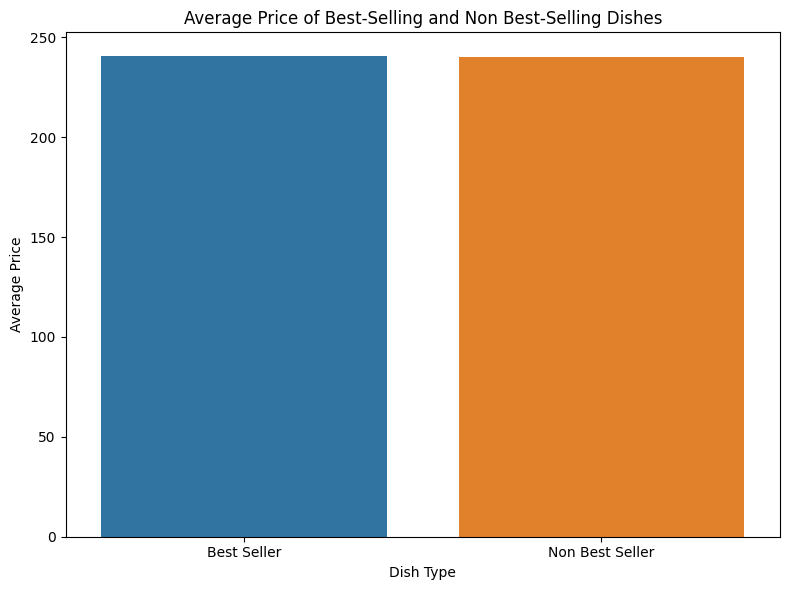

In [6]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Best Seller', 'Non Best Seller'], y=[total_bestseller, total_not_bestseller])
plt.xlabel('Dish Type')
plt.ylabel('Average Price')
plt.title('Average Price of Best-Selling and Non Best-Selling Dishes')
plt.tight_layout()
plt.show()

#### *2.Average price for a person in restaurants*

In [7]:
sortdining2=zomato['Prices'].groupby(zomato['Restaurant Name']).mean().sort_values(ascending=False)
sorts=pd.DataFrame(sortdining2)
print(sorts.head(5))
print(sorts.tail(5))

                            Prices
Restaurant Name                   
Zaffran Mataam Alarabi  805.652174
Barbeque Nation         656.747899
Khalids Biriyani        604.054058
Exotica                 561.775148
The Fatty Bao           555.720930
                              Prices
Restaurant Name                     
Sukumar Food Court         62.888889
Iyer Mess                  56.571429
Patil Misal                46.846154
Bole To Vadapav            40.847458
Jai Bhavani Snacks Center  38.750000


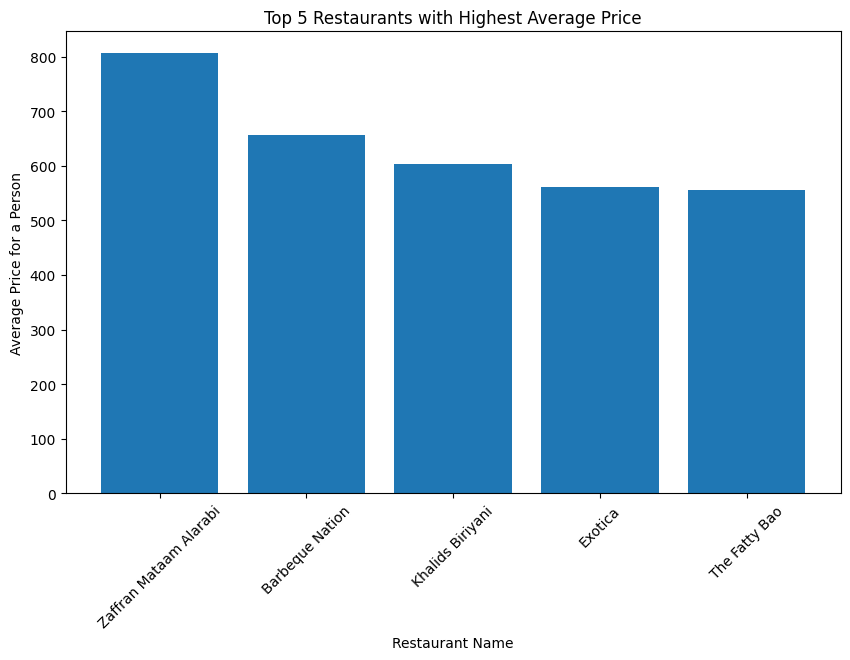

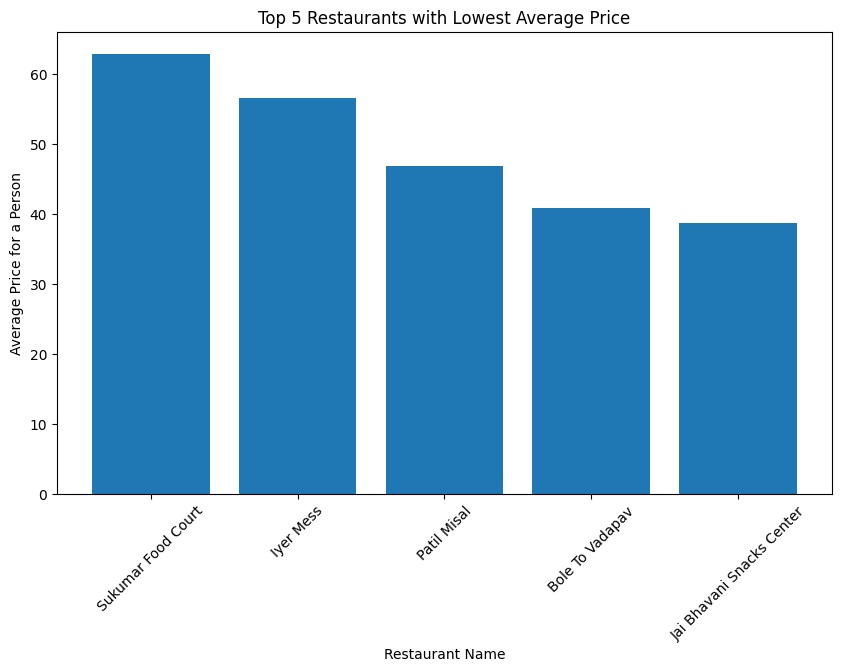

In [8]:
# Plotting the top 5 restaurants with highest average price
top_5_high = sorts.head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_5_high.index, top_5_high['Prices'])
plt.xlabel('Restaurant Name')
plt.ylabel('Average Price for a Person')
plt.title('Top 5 Restaurants with Highest Average Price')
plt.xticks(rotation=45)
plt.show()

# Plotting the top 5 restaurants with lowest average price
top_5_low = sorts.tail(5)
plt.figure(figsize=(10, 6))
plt.bar(top_5_low.index, top_5_low['Prices'])
plt.xlabel('Restaurant Name')
plt.ylabel('Average Price for a Person')
plt.title('Top 5 Restaurants with Lowest Average Price')
plt.xticks(rotation=45)
plt.show()

#### *3.Top restaurants in each city and cuisines they serve.*

In [9]:
zomato_filter=zomato.dropna(subset=['Dining Rating'])


highest_avg_dining_rating = zomato_filter['Dining Rating'].groupby(zomato_filter['City']).idxmax()
restaurants_with_highest_rating = zomato_filter.loc[highest_avg_dining_rating, ['City', 'Restaurant Name','Cuisine ', 'Dining Rating']]
print(restaurants_with_highest_rating)

                 City            Restaurant Name    Cuisine   Dining Rating
89172       Ahmedabad              Urban Khichdi   Beverages            4.6
94473       Banaswadi                    GOPIZZA   Fast Food            3.7
65625       Bangalore                   Truffles    Desserts            4.6
32723         Chennai  AB's - Absolute Barbecues    Desserts            4.7
63090             Goa               Ritz Classic   Beverages            4.4
15354       Hyderabad                    Exotica   Beverages            4.6
76069          Jaipur             Thali and More   Beverages            4.7
56766           Kochi                    Cafe 17   Beverages            4.6
72232         Kolkata                    Chowman   Beverages            4.4
100331        Lucknow                Dastarkhwan      Awadhi            4.5
99791    Magrath Road        Keventers Ice Cream    Desserts            3.5
96031    Malleshwaram                   Rajdhani  Rajasthani            4.0
17436       

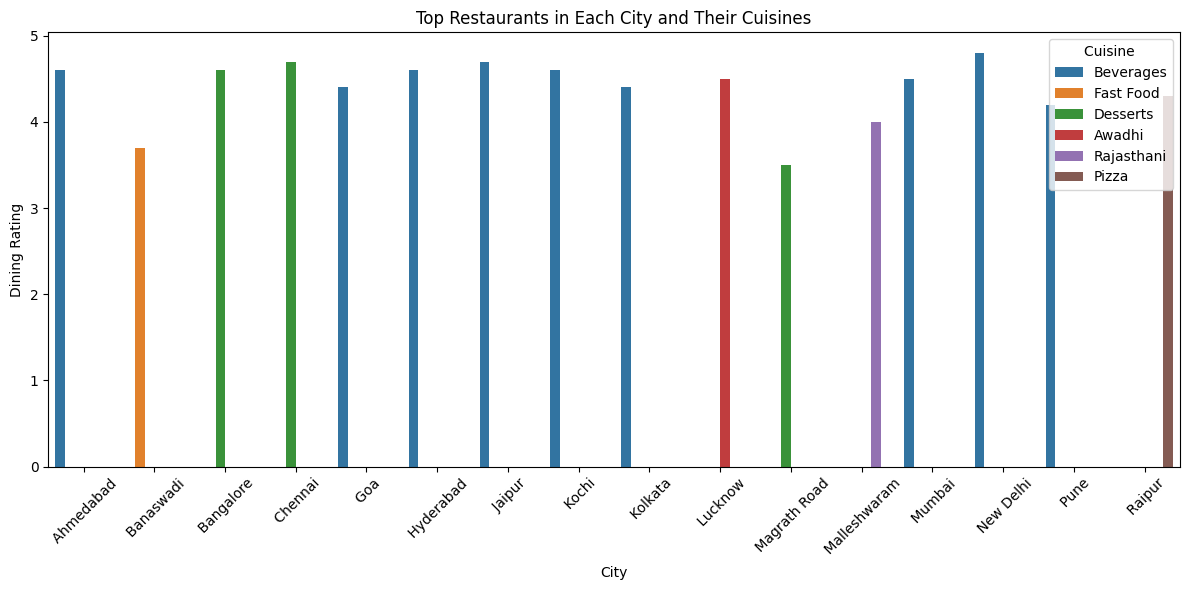

In [10]:
# Create a grouped bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Dining Rating', hue='Cuisine ', data=restaurants_with_highest_rating)
plt.xlabel('City')
plt.ylabel('Dining Rating')
plt.title('Top Restaurants in Each City and Their Cuisines')
plt.xticks(rotation=45)
plt.legend(title='Cuisine ')
plt.tight_layout()
plt.show()

#### 4.How many unique cuisines are represented in the dataset?

In [11]:
uniq_cuisine=zomato['Cuisine '].nunique()
print("No of Unique cuisine: ",uniq_cuisine)
print("Cuisines are: ",zomato['Cuisine '].unique())

No of Unique cuisine:  40
Cuisines are:  ['Fast Food' 'Wraps' 'Biryani' 'Chinese' 'Beverages' 'Desserts' 'Shake'
 'South Indian' 'Kebab' 'Bakery' 'Ice Cream' 'Mughlai' 'North Indian'
 'Mandi' 'Shawarma' 'Burger' 'Turkish' 'Coffee' 'Pizza' 'Seafood' 'Rolls'
 'Hyderabadi' 'Sandwich' 'Sichuan' 'Kerala' 'BBQ' 'Rajasthani' 'Tibetan'
 'Street Food' 'Juices' 'Continental' 'Maharashtrian' 'Momos' 'American'
 'Gujarati' 'Kathiyawadi' 'Pasta' 'Mexican' 'Andhra' 'Awadhi']


#### 5.Top 15 Locations with Best Average Rating

C:\Users\PRATHAMESH\AppData\Local\Temp\ipykernel_15364\1967525994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zom_clean['Average'] = zom_clean[['Dining Rating','Delivery Rating']].mean(axis = 1)


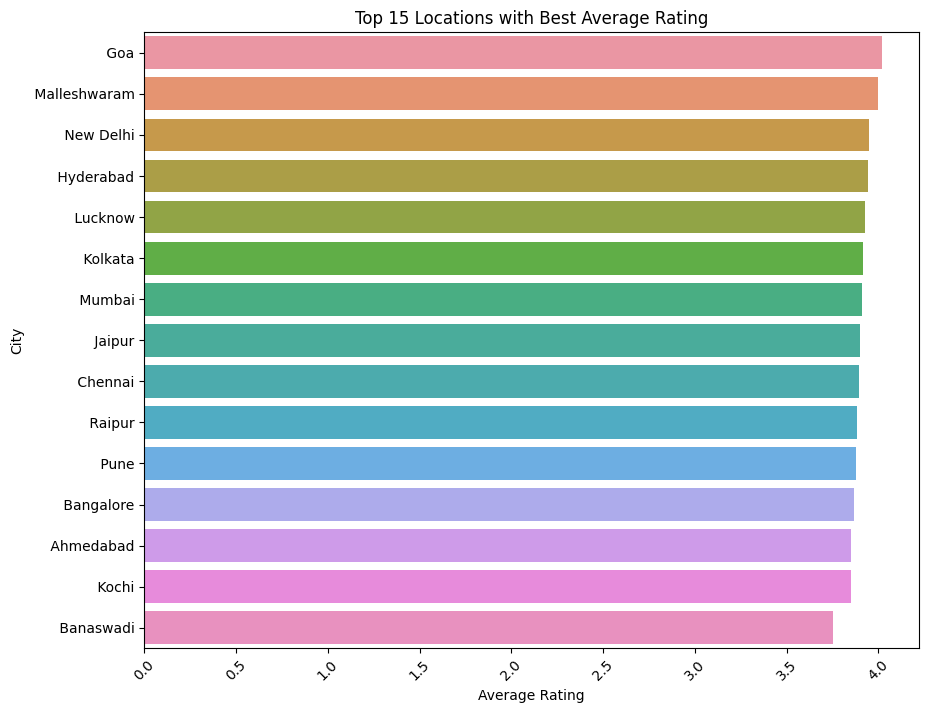

In [12]:
zom_clean = zomato.dropna(subset=['Dining Rating','Delivery Rating'])
zom_clean['Average'] = zom_clean[['Dining Rating','Delivery Rating']].mean(axis = 1)
average_ratings = zom_clean.groupby('City')['Average'].mean().reset_index()
top_10_loc = average_ratings.nlargest( 15,'Average')

plt.figure(figsize=(10,8))
sns.barplot(data=top_10_loc, x='Average', y='City')
plt.title('Top 15 Locations with Best Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.xticks(rotation=45)
plt.show()

#### 6.Distribution of average ratings for restaurants in different cities.

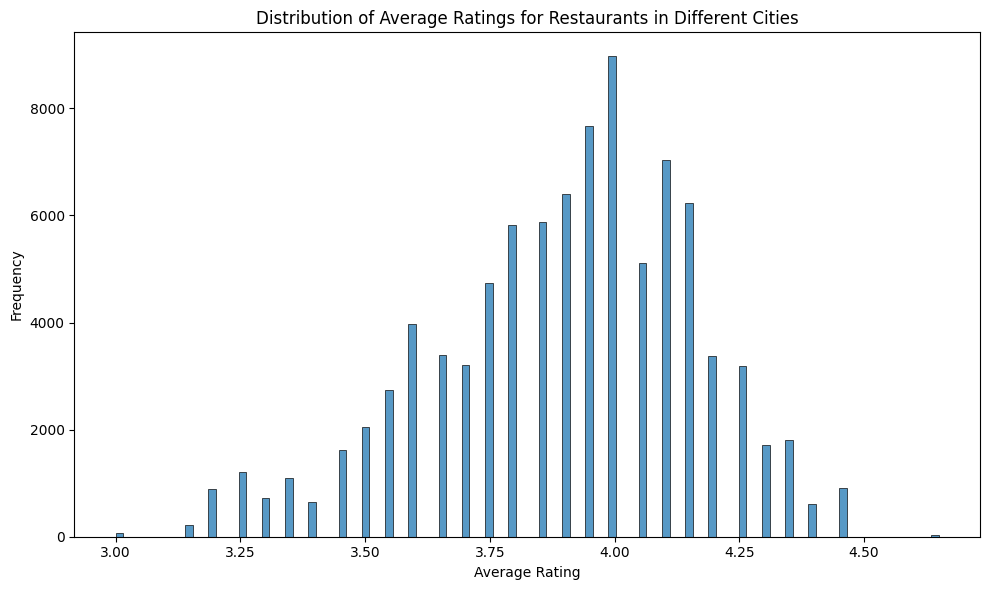

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(zom_clean['Average'])
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings for Restaurants in Different Cities')
plt.tight_layout()
plt.show()

#### 7.Restaurants and their counts from highest to lowest

Text(0.5, 1.0, 'Name vs Number of Restaurant')

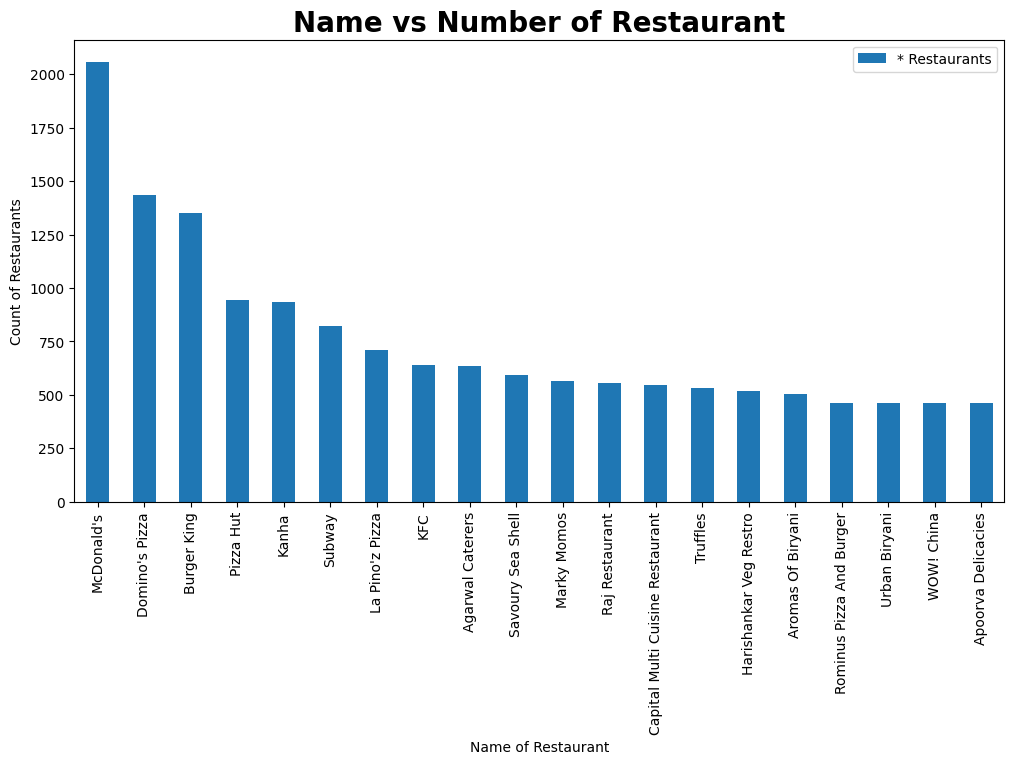

In [14]:
plt.figure(figsize = (12,6))
ax = zomato_filter['Restaurant Name'].value_counts()[:20].plot(kind = 'bar')
ax.legend(['* Restaurants'])
plt.xlabel("Name of Restaurant")
plt.ylabel("Count of Restaurants")
plt.title("Name vs Number of Restaurant",fontsize =20, weight = 'bold')

#### 8.What is the total number of dining votes received by all restaurants in each city?

In [15]:
total_dining_votes = zomato['Dining Votes'].groupby(zomato['City']).sum()
print(total_dining_votes.sort_values(ascending=False))

City
 Jaipur          3049158
 Chennai         2608970
 Hyderabad       2063790
 Mumbai          1863212
 Kolkata         1758904
 Lucknow         1471925
 Ahmedabad       1455864
 Bangalore       1422983
 Kochi           1201704
 Pune             700977
 New Delhi        687767
 Raipur           513582
 Goa               46808
 Malleshwaram      32078
 Banaswadi          4559
 Magrath Road          0
Name: Dining Votes, dtype: int64


#### 9.How many unique cuisines are represented in the dataset?

In [16]:
uniq_cuisine=zomato['Cuisine '].nunique()
print("No of Unique cuisine: ",uniq_cuisine)
print("Cuisines are: ",zomato['Cuisine '].unique())

No of Unique cuisine:  40
Cuisines are:  ['Fast Food' 'Wraps' 'Biryani' 'Chinese' 'Beverages' 'Desserts' 'Shake'
 'South Indian' 'Kebab' 'Bakery' 'Ice Cream' 'Mughlai' 'North Indian'
 'Mandi' 'Shawarma' 'Burger' 'Turkish' 'Coffee' 'Pizza' 'Seafood' 'Rolls'
 'Hyderabadi' 'Sandwich' 'Sichuan' 'Kerala' 'BBQ' 'Rajasthani' 'Tibetan'
 'Street Food' 'Juices' 'Continental' 'Maharashtrian' 'Momos' 'American'
 'Gujarati' 'Kathiyawadi' 'Pasta' 'Mexican' 'Andhra' 'Awadhi']


#### 10.Which restaurant has the highest average dining rating in each city

In [17]:
highest_avg_dining_rating = zomato_filter['Dining Rating'].groupby(zomato_filter['City']).idxmax()
restaurants_with_highest_rating = zomato_filter.loc[highest_avg_dining_rating, ['City', 'Restaurant Name', 'Dining Rating']]
print(restaurants_with_highest_rating)

                 City            Restaurant Name  Dining Rating
89172       Ahmedabad              Urban Khichdi            4.6
94473       Banaswadi                    GOPIZZA            3.7
65625       Bangalore                   Truffles            4.6
32723         Chennai  AB's - Absolute Barbecues            4.7
63090             Goa               Ritz Classic            4.4
15354       Hyderabad                    Exotica            4.6
76069          Jaipur             Thali and More            4.7
56766           Kochi                    Cafe 17            4.6
72232         Kolkata                    Chowman            4.4
100331        Lucknow                Dastarkhwan            4.5
99791    Magrath Road        Keventers Ice Cream            3.5
96031    Malleshwaram                   Rajdhani            4.0
17436          Mumbai                  Chaitanya            4.5
106300      New Delhi          Natural Ice Cream            4.8
43248            Pune                   